## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse - Variablen

##### Werkzeuge und Daten importieren

In [1]:
from funktionen import *
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import math
from scipy import stats
from sklearn import tree
import seaborn as sns
sns.set(style="whitegrid") #"white", "darkgrid"...
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Daten = pd.read_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_2017-19_ber')

In [3]:
Daten.shape

(401, 377)

In [4]:
#Daten.head(3)

In [5]:
gloss = pd.read_pickle('D:\Daten\DISS\Daten\Gloss2018')

##### Untergruppen und Listen für die Analyse

In [6]:
Daten_A3 = Daten[Daten['A-Q3_27'] >= 1]

In [7]:
Daten_A3.shape

(396, 377)

In [8]:
Finished = Daten[Daten['C-Q1_7'] >= 1]

In [9]:
Finished.shape

(391, 377)

Liste erstellen:

In [10]:
Liste_A_Q2 = [col for col in Daten.columns if 'A-Q2' in col]

In [11]:
Liste_A_Q3 = [col for col in Daten.columns if 'A-Q3' in col]
Liste_A_Q3.pop(3)

'A-Q3_3_TEXT'

In [12]:
Liste_C_Q1 = [col for col in Finished.columns if 'C-Q1' in col]

#### Unabhängige Variablen

Studienrichtung:

In [13]:
Daten['D-Q2a_neu'] = 0

In [14]:
j=0
for i in Daten[Daten['D-Q2a']!=0]['D-Q2a']:
    if i == 1:
        Daten.loc[j,'D-Q2a_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q2a_neu'] = 2
    elif i == 3 or i == 4:
        Daten.loc[j,'D-Q2a_neu'] = 3
    else:
        Daten.loc[j,'D-Q2a_neu'] = 4
    j = j+1

In [15]:
Daten.rename(columns={'D-Q2a_neu':'V_Studienrichtung'}, inplace=True)

??? Studienjahr (+ Studium):

In [16]:
Daten['D-Q2b_neu'] = 0

j=0
for i in Daten[Daten['D-Q2b']!=0]['D-Q2b']:
    if i == 1:
        Daten.loc[j,'D-Q2b_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q2b_neu'] = 2
    elif i == 3:
        Daten.loc[j,'D-Q2b_neu'] = 3
    elif i == 4:
        Daten.loc[j,'D-Q2b_neu'] = 4
    j = j+1

In [17]:
j=0
for i in Daten['D-Q2']:
    if i == 2:
        Daten.loc[j,'D-Q2b_neu'] = 5
    elif i == 3:
        Daten.loc[j,'D-Q2b_neu'] = 5
    j = j+1

In [18]:
Daten.rename(columns={'D-Q2b_neu':'V_Studienjahr+Studium'}, inplace=True)

Niveau des aktuellen Deutschkurses:

In [19]:
Daten['D-Q4_neu'] = 0

j=0
for i in Daten[Daten['D-Q4']!=0]['D-Q4']:
    if i == 1:
        Daten.loc[j,'D-Q4_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q4_neu'] = 2
    elif i == 3:
        Daten.loc[j,'D-Q4_neu'] = 3
    elif i == 4:
        Daten.loc[j,'D-Q4_neu'] = 4
    else:
        Daten.loc[j,'D-Q4_neu'] = 5
    j = j+1

In [20]:
Daten.rename(columns={'D-Q4_neu':'V_Niveau_DK'}, inplace=True)

Alter:

In [21]:
Daten['D-Q5_neu'] = 0

j=0
for i in Daten[Daten['D-Q5']!=0]['D-Q5']:
    if i <= 18:
        Daten.loc[j,'D-Q5_neu'] = 1
    elif i == 19:
        Daten.loc[j,'D-Q5_neu'] = 2
    elif i == 20 or i == 4:
        Daten.loc[j,'D-Q5_neu'] = 3
    else:
        Daten.loc[j,'D-Q5_neu'] = 4
    j = j+1

In [22]:
Daten.rename(columns={'D-Q5_neu':'V_Alter'}, inplace=True)

Geschlecht:

In [23]:
Daten['D-Q6_neu'] = 0

j=0
for i in Daten[Daten['D-Q6']!=0]['D-Q6']:
    if i == 1:
        Daten.loc[j,'D-Q6_neu'] = 1
    elif i == 2:
        Daten.loc[j,'D-Q6_neu'] = 2
    j = j+1

In [24]:
Daten['D-Q6_neu'].value_counts()

1    287
2     91
0     23
Name: D-Q6_neu, dtype: int64

In [25]:
Daten.rename(columns={'D-Q6_neu':'V_Geschlecht'}, inplace=True)

In [26]:
Daten['D-Q6'].value_counts()

1    287
2     91
0     17
3      6
Name: D-Q6, dtype: int64

In [27]:
#Daten.rename(columns={'D-Q6':'V_Geschlecht1'}, inplace=True)

Erstsprache Spanisch:

In [28]:
Daten['D-Q7_neu'] = 0

j=0
for i in Daten['D-Q7']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    j = j+1

j=0
for i in Daten['D-Q7c']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    j = j+1

j=0
for i in Daten['D-Q7e']:
    if i == 1:
        Daten.loc[j,'D-Q7_neu'] = 1
    j = j+1

363 Studierende haben Spanisch als eine ihrer Erstsprachen angegeben. Die übrigen 25 verteilen sich auf verschiedene Sprachen (13 TN haben diese Frage nicht beantwortet), darunter haben 5 Personen Katalanisch/Valencianisch und 4 Galicisch angegeben.

In [29]:
Daten['D-Q7_neu'].value_counts()

1    363
0     38
Name: D-Q7_neu, dtype: int64

In [30]:
Daten.rename(columns={'D-Q7_neu':'V_Erstsprache_Span'}, inplace=True)

L1-Bi/Trilingualismus:

In [31]:
Daten['D-Q7b'].value_counts()

2    287
1    103
0     11
Name: D-Q7b, dtype: int64

103 Personen sind laut eigenen Angaben bi- oder trilingual.

In [32]:
Daten.rename(columns={'D-Q7b':'V_L1-Bi/Trilingualismus'}, inplace=True)

Weitere Sprachkenntnisse:

In [33]:
Spr_cols = ['D-Q7','D-Q7c','D-Q7e','D-Q8_1','D-Q8_2','D-Q8_3','D-Q8_4','D-Q8_5','D-Q8_6','D-Q8_7']

In [34]:
l_germ = [9,15,39,19,36]
l_rom = [13,16,17]
l_slaw = [23,24,25,26,27,28,41,18,44]
l_asiat = [6,7,8,22,31,42,45]

In [35]:
Daten['D-Q8_fr'] = 0
Daten['D-Q8_gr'] = 0
Daten['D-Q8_lat'] = 0
Daten['D-Q8_germ'] = 0
Daten['D-Q8_rom'] = 0
Daten['D-Q8_slaw'] = 0
Daten['D-Q8_asiat'] = 0

In [36]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 10:
            Daten.loc[i,'D-Q8_fr'] = 1
            pass

In [37]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 20:
            Daten.loc[i,'D-Q8_gr'] = 1
            pass

In [38]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el == 21:
            Daten.loc[i,'D-Q8_lat'] = 1
            pass

In [39]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_germ:
            Daten.loc[i,'D-Q8_germ'] = 1
            pass

In [40]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_rom:
            Daten.loc[i,'D-Q8_rom'] = 1
            pass

In [41]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_slaw:
            Daten.loc[i,'D-Q8_slaw'] = 1
            pass

In [42]:
for i in Daten.index:
    for el in Daten.loc[i,Spr_cols]:
        if el in l_asiat:
            Daten.loc[i,'D-Q8_asiat'] = 1
            pass

In [43]:
Daten.rename(columns={'D-Q8_fr':'V_Spr_Fran'}, inplace=True)
Daten.rename(columns={'D-Q8_gr':'V_Spr_Griech'}, inplace=True)
Daten.rename(columns={'D-Q8_lat':'V_Spr_Latein'}, inplace=True)
Daten.rename(columns={'D-Q8_germ':'V_Spr_Germ'}, inplace=True)
Daten.rename(columns={'D-Q8_rom':'V_Spr_Rom'}, inplace=True)
Daten.rename(columns={'D-Q8_slaw':'V_Spr_Slaw'}, inplace=True)
Daten.rename(columns={'D-Q8_asiat':'V_Spr_Asiat'}, inplace=True)

Strategienerwerbskontexte:

In [44]:
erwerb = {'E1': ['B-Q2-1_1','B-Q2-1_2','B-Q2-1_3','B-Q2-1_4','B-Q2-1_5','B-Q2-1_6','B-Q2-1_7'], 
         'E2': ['B-Q2-2_1','B-Q2-2_2','B-Q2-2_3','B-Q2-2_4','B-Q2-2_5','B-Q2-2_6','B-Q2-2_7'],
         'E3': ['B-Q2-3_1','B-Q2-3_2','B-Q2-3_3','B-Q2-3_4','B-Q2-3_5','B-Q2-3_6','B-Q2-3_7'],
         'E4': ['B-Q2-4_1','B-Q2-4_2','B-Q2-4_3','B-Q2-4_4','B-Q2-4_5','B-Q2-4_6','B-Q2-4_7'],
         'E5': ['B-Q2-5_1','B-Q2-5_2','B-Q2-5_3','B-Q2-5_4','B-Q2-5_5','B-Q2-5_6','B-Q2-5_7'],
         'E6': ['B-Q2-6_1','B-Q2-6_2','B-Q2-6_3','B-Q2-6_4','B-Q2-6_5','B-Q2-6_6','B-Q2-6_7'],
         'E7': ['B-Q2-7_1','B-Q2-7_2','B-Q2-7_3','B-Q2-7_4','B-Q2-7_5','B-Q2-7_6','B-Q2-7_7'],
         'E8': ['B-Q2-8_1','B-Q2-8_2','B-Q2-8_3','B-Q2-8_4','B-Q2-8_5'],
         'E9': ['B-Q2-9_1','B-Q2-9_2','B-Q2-9_3','B-Q2-9_4','B-Q2-9_5']}

* 1- En las clases de Lengua y Literatura en el colegio o instituto
* 2- En las clases de inglés en el colegio o instituto
* 3- En otras clases de idiomas en el colegio o instituto
* 4- En clases de alemán anteriores en la Universidad
* 5- En otras asignaturas de mi carrera universitaria
* 6- En clases de lenguas en escuelas de idiomas o academias
* 7- En mi curso de alemán actual
* 8- En mi familia, con mis amigos/as o compañeros/as de clase
* 9- Por mi cuenta, sin ayuda de otras personas
* 10- Otros:
* 11- No sé cómo he aprendido estas estrategias.

In [45]:
Daten['B-Q2_E1'] = 0
Daten['B-Q2_E2'] = 0
Daten['B-Q2_E3'] = 0
Daten['B-Q2_E4'] = 0
Daten['B-Q2_E5'] = 0
Daten['B-Q2_E6'] = 0
Daten['B-Q2_E7'] = 0
Daten['B-Q2_E8'] = 0
Daten['B-Q2_E9'] = 0

In [46]:
add_columns(Daten,erwerb['E1'],'B-Q2_E1')

In [47]:
add_columns(Daten,erwerb['E2'],'B-Q2_E2')

In [48]:
add_columns(Daten,erwerb['E3'],'B-Q2_E3')

In [49]:
add_columns(Daten,erwerb['E4'],'B-Q2_E4')

In [50]:
add_columns(Daten,erwerb['E5'],'B-Q2_E5')

In [51]:
add_columns(Daten,erwerb['E6'],'B-Q2_E6')

In [52]:
add_columns(Daten,erwerb['E7'],'B-Q2_E7')

In [53]:
add_columns(Daten,erwerb['E8'],'B-Q2_E8')

In [54]:
add_columns(Daten,erwerb['E9'],'B-Q2_E9')

In [55]:
Daten.rename(columns={'B-Q2_E1':'V_E_Schule_LL'}, inplace=True)
Daten.rename(columns={'B-Q2_E2':'V_E_Schule_Eng'}, inplace=True)
Daten.rename(columns={'B-Q2_E3':'V_E_Schule_Spr'}, inplace=True)
Daten.rename(columns={'B-Q2_E4':'V_E_Univ_DK'}, inplace=True)
Daten.rename(columns={'B-Q2_E5':'V_E_Univ_andere'}, inplace=True)
Daten.rename(columns={'B-Q2_E6':'V_E_Sprachschule'}, inplace=True)
Daten.rename(columns={'B-Q2_E7':'V_E_DK_aktuell'}, inplace=True)
Daten.rename(columns={'B-Q2_E8':'V_E_Sozial'}, inplace=True)
Daten.rename(columns={'B-Q2_E9':'V_E_autonom'}, inplace=True)

Methoden des Strategienerwerbs:

In [56]:
erwerb1 = {'U1': ['B-Q2-1_1','B-Q2-2_1','B-Q2-3_1','B-Q2-4_1','B-Q2-5_1','B-Q2-6_1','B-Q2-7_1'], 
         'U2': ['B-Q2-1_2','B-Q2-2_2','B-Q2-3_2','B-Q2-4_2','B-Q2-5_2','B-Q2-6_2','B-Q2-7_2'],
         'U3': ['B-Q2-1_3','B-Q2-2_3','B-Q2-3_3','B-Q2-4_3','B-Q2-5_3','B-Q2-6_3','B-Q2-7_3'],
         'U4': ['B-Q2-1_4','B-Q2-2_4','B-Q2-3_4','B-Q2-4_4','B-Q2-5_4','B-Q2-6_4','B-Q2-7_4'],
         'U5': ['B-Q2-1_5','B-Q2-2_5','B-Q2-3_5','B-Q2-4_5','B-Q2-5_5','B-Q2-6_5','B-Q2-7_5'],
         'U6': ['B-Q2-1_6','B-Q2-2_6','B-Q2-3_6','B-Q2-4_6','B-Q2-5_6','B-Q2-6_6','B-Q2-7_6']}

* (1)	Las estrategias se presentaron (y explicaron) en clase.
* (2)	El/La profesor/a dio consejos sobre cómo familiarizarse de manera autónoma con estas estrategias, p. ej. mediante páginas web, libros u otros materiales que explican estrategias de aprendizaje. 
* (3)	Estas estrategias se explicaron y practicaron con ejemplos concretos, realizando tareas, p. ej. leyendo un texto difícil.
* (4)	Se probaron y se compararon diferentes estrategias.
* (5)	Se reflexionó sobre el uso de estas estrategias, p. ej. sobre qué estrategia sería adecuada en una situación y/o para una persona determinada.
* (6)	Durante las clases he aprendido estas estrategias de manera inconsciente, p. ej. mientras leía textos difíciles, sin explicación o indicación del/de la profesor/a.
* (7)	Otros:

In [57]:
Daten['B-Q2_U1'] = 0
Daten['B-Q2_U2'] = 0
Daten['B-Q2_U3'] = 0
Daten['B-Q2_U4'] = 0
Daten['B-Q2_U5'] = 0
Daten['B-Q2_U6'] = 0

In [58]:
add_columns(Daten,erwerb1['U1'],'B-Q2_U1')

In [59]:
add_columns(Daten,erwerb1['U2'],'B-Q2_U2')

In [60]:
add_columns(Daten,erwerb1['U3'],'B-Q2_U3')

In [61]:
add_columns(Daten,erwerb1['U4'],'B-Q2_U4')

In [62]:
add_columns(Daten,erwerb1['U5'],'B-Q2_U5')

In [63]:
add_columns(Daten,erwerb1['U6'],'B-Q2_U6')

In [64]:
Daten.rename(columns={'B-Q2_U1':'V_Met_Erkl'}, inplace=True)
Daten.rename(columns={'B-Q2_U2':'V_Met_Tipps'}, inplace=True)
Daten.rename(columns={'B-Q2_U3':'V_Met_Training'}, inplace=True)
Daten.rename(columns={'B-Q2_U4':'V_Met_Vgl'}, inplace=True)
Daten.rename(columns={'B-Q2_U5':'V_Met_Reflexion'}, inplace=True)
Daten.rename(columns={'B-Q2_U6':'V_Met_unbewusst'}, inplace=True)

#### Mögliche weitere Einflussfaktoren

Pilotstudie:

In [65]:
Daten['pilot'].value_counts()

0    333
1     68
Name: pilot, dtype: int64

Erhebungssituation:

In [66]:
Daten['D-Q9_1'].value_counts()

1    228
0    173
Name: D-Q9_1, dtype: int64

Version des Fragebogens:

In [67]:
Daten['D-Q9_pap'] = 0

j=0
for i in Daten['IPAddress']:
    if i == '2.154.100.40':
        Daten.loc[j,'D-Q9_pap'] = 1
    j = j+1

In [68]:
Daten[Daten['D-Q9_pap']==1]['D-Q1'].value_counts()

67    54
50     7
20     3
63     1
Name: D-Q1, dtype: int64

Universitäten:

In [69]:
Daten['D-Q1_Sal'] = 0
Daten['D-Q1_Sev'] = 0
Daten['D-Q1_Vigo'] = 0
Daten['D-Q1_Gran'] = 0
Daten['D-Q1_Sant'] = 0
Daten['D-Q1_Madrid'] = 0

In [70]:
j=0
for i in Daten['D-Q1']:
    if i == 63:
        Daten.loc[j,'D-Q1_Sal'] = 1
    j = j+1

In [71]:
j=0
for i in Daten['D-Q1']:
    if i == 67:
        Daten.loc[j,'D-Q1_Sev'] = 1
    j = j+1

In [72]:
j=0
for i in Daten['D-Q1']:
    if i == 73:
        Daten.loc[j,'D-Q1_Vigo'] = 1
    j = j+1

In [73]:
j=0
for i in Daten['D-Q1']:
    if i == 29:
        Daten.loc[j,'D-Q1_Gran'] = 1
    j = j+1

In [74]:
j=0
for i in Daten['D-Q1']:
    if i == 66:
        Daten.loc[j,'D-Q1_Sant'] = 1
    j = j+1

In [75]:
j=0
for i in Daten['D-Q1']:
    if i == 20:
        Daten.loc[j,'D-Q1_Madrid'] = 1
    j = j+1

In [76]:
Daten['D-Q1_Madrid'].value_counts()

0    375
1     26
Name: D-Q1_Madrid, dtype: int64

In [77]:
Finished = Daten[Daten['Finished']==1]

#### Abhängige Variablen

In [78]:
strat = {'S1': ['A-Q3_5','A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9'], 
         'S2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
         'S3': ['A-Q3_9','A-Q3_10','A-Q3_11','A-Q3_12'],
         'S4': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         #'S4a': ['A-Q3_13','A-Q3_14','A-Q3_15','A-Q3_16'],
         #'S4b': ['A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
         'S5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24','A-Q3_25'],
         'S6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* S1: Auf Wortebene - intralingual
* S2: Auf Wortebene - interlingual
* S3: Auf Satz- und Textebene - engerer Kontext
* S4: Auf Satz- und Textebene - weiterer Kontext (S4a: intratextuell, S4b: Bezug zu Fach- und Weltwissen)
* S5: Außersprachlicher Kontext
* S6: Metakognitive Strategien

Ergebnisse der Faktorenanalyse (in R durchgeführt):

In [79]:
fakt = {'F1': ['A-Q3_6','A-Q3_7','A-Q3_8','A-Q3_9','A-Q3_14','A-Q3_15','A-Q3_10'], 
        'F2': ['A-Q3_1','A-Q3_2','A-Q3_3','A-Q3_4','A-Q3_5'],
        'F3': ['A-Q3_10','A-Q3_11','A-Q3_12','A-Q3_13'],
        'F4': ['A-Q3_16','A-Q3_17','A-Q3_18','A-Q3_19','A-Q3_20'],
        'F5': ['A-Q3_21','A-Q3_22','A-Q3_23','A-Q3_24'],
        'F6': ['A-Q3_26','A-Q3_27','A-Q3_28','A-Q3_29','A-Q3_30','A-Q3_31']}

* F1(MR2): intralinguale Hinweise (Wortbildung, morphosyntaktische Regularitäten, Orthographie) + Konnektoren, Erklärungshilfen
* F2(MR3): interlinguale Hinweise (inkl. Ethymologie)
* F3(MR4): engerer Kontext, Analyse auf Satzebene (Syntax, semantische Relationen)
* F4(MR1): Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* F5(MR6): Bilder, Grafiken, Symbole, Zahlen, Kommunikationssituation
* F6(MR5): metakognitive Strategien

Anpassung der Strategiengruppen nach Erkenntnissen der Faktorenanalyse?

problematisch: Item 14, 15; 10; 13, 16; 25?

##### Scores

Score für alle Likert-Items in A_Q3:

In [80]:
Score = []
for i in Daten.index:
    Score.append(sum(Daten[Liste_A_Q3].loc[i]))

In [81]:
Daten['A-Q3_Score'] = Score

Scores für die einzelnen Strategiengruppen in A_Q3:

In [82]:
Score_S1 = []
for i in Daten.index:
    Score_S1.append(sum(Daten[strat['S1']].loc[i]))

Daten['A-Q3_Score_S1'] = Score_S1

In [83]:
Score_S2 = []
for i in Daten.index:
    Score_S2.append(sum(Daten[strat['S2']].loc[i]))

Daten['A-Q3_Score_S2'] = Score_S2

In [84]:
Score_S3 = []
for i in Daten.index:
    Score_S3.append(sum(Daten[strat['S3']].loc[i]))

Daten['A-Q3_Score_S3'] = Score_S3

In [85]:
Score_S4 = []
for i in Daten.index:
    Score_S4.append(sum(Daten[strat['S4']].loc[i]))

Daten['A-Q3_Score_S4'] = Score_S4

In [86]:
Score_S5 = []
for i in Daten.index:
    Score_S5.append(sum(Daten[strat['S5']].loc[i]))

Daten['A-Q3_Score_S5'] = Score_S5

In [87]:
Score_S6 = []
for i in Daten.index:
    Score_S6.append(sum(Daten[strat['S6']].loc[i]))

Daten['A-Q3_Score_S6'] = Score_S6

##### Mindestanzahl an Strategien

Mindestanzahl an Strategien nach Strategiengruppen:

In [88]:
Daten['A-Q3_S1'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S1']]
    if el[el>=3].count() >= 2:
        Daten.loc[i,'A-Q3_S1'] = 1

In [89]:
Daten['A-Q3_S2'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S2']]
    if el[el>=3].count() >= 2:
        Daten.loc[i,'A-Q3_S2'] = 1

In [90]:
Daten['A-Q3_S3'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S3']]
    if el[el>=3].count() >= 2:
        Daten.loc[i,'A-Q3_S3'] = 1

In [91]:
Daten['A-Q3_S4'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S4']]
    if el[el>=3].count() >= 4:
        Daten.loc[i,'A-Q3_S4'] = 1

In [92]:
Daten['A-Q3_S5'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S5']]
    if el[el>=3].count() >= 2:
        Daten.loc[i,'A-Q3_S5'] = 1

In [117]:
Daten['A-Q3_S6'] = 0

for i in Daten.index:
    el = Daten.loc[i,strat['S6']]
    if el[el>=3].count() >= 3:
        Daten.loc[i,'A-Q3_S6'] = 1

In [110]:
strat_gr = ['A-Q3_S1','A-Q3_S2','A-Q3_S3','A-Q3_S4','A-Q3_S5','A-Q3_S6']

In [118]:
Daten[strat_gr].sum()

A-Q3_S1    368
A-Q3_S2    369
A-Q3_S3    337
A-Q3_S4    364
A-Q3_S5    368
A-Q3_S6    379
dtype: int64

In [121]:
Stratgr_sum = []
for i in Daten.index:
    Stratgr_sum.append(sum(Daten[strat_gr].loc[i]))

Daten['A-Q3_Stratgr'] = Stratgr_sum

In [122]:
Daten['A-Q3_Stratgr'].value_counts()

6    260
5     94
4     32
3      6
2      3
1      3
0      3
Name: A-Q3_Stratgr, dtype: int64

Kombinierter Strategieneinsatz:

In [123]:
Daten['A-Q3_Stratgr_all'] = 0

j=0
for i in Daten['A-Q3_Stratgr']:
    if i == 6:
        Daten.loc[j,'A-Q3_Stratgr_all'] = 1
    j = j+1

In [124]:
Daten['A-Q3_Stratgr_all'].value_counts()

1    260
0    141
Name: A-Q3_Stratgr_all, dtype: int64

#### Auswahl der Variablen für die Analyse

In [125]:
Liste_A_Q3_ext = [col for col in Daten.columns if 'A-Q3' in col]
Liste_A_Q3_ext.pop(3)

'A-Q3_3_TEXT'

In [98]:
Liste_Var = [col for col in Daten.columns if 'V_' in col]

In [99]:
Liste_Var

['V_L1-Bi/Trilingualismus',
 'V_Studienrichtung',
 'V_Studienjahr+Studium',
 'V_Niveau_DK',
 'V_Alter',
 'V_Geschlecht',
 'V_Erstsprache_Span',
 'V_Spr_Fran',
 'V_Spr_Griech',
 'V_Spr_Latein',
 'V_Spr_Germ',
 'V_Spr_Rom',
 'V_Spr_Slaw',
 'V_Spr_Asiat',
 'V_E_Schule_LL',
 'V_E_Schule_Eng',
 'V_E_Schule_Spr',
 'V_E_Univ_DK',
 'V_E_Univ_andere',
 'V_E_Sprachschule',
 'V_E_DK_aktuell',
 'V_E_Sozial',
 'V_E_autonom',
 'V_Met_Erkl',
 'V_Met_Tipps',
 'V_Met_Training',
 'V_Met_Vgl',
 'V_Met_Reflexion',
 'V_Met_unbewusst']

In [126]:
Daten_Analyse = Daten[Liste_A_Q2 + Liste_A_Q3_ext + Liste_C_Q1 + Liste_Var]

In [127]:
Daten_Analyse.shape

(401, 91)

In [102]:
def get_CT_int(data,col,row):
    col_names = [col+'_'+str(el) for el in np.sort(data[col].unique()) ]
    row_names = [row+'_'+str(el) for el in np.sort(data[row].unique()) ]
    
    return pd.DataFrame(pd.crosstab(data[row],data[col]).values,index=row_names, columns=col_names)

In [103]:
def get_colsORrows_namesTOT(data,cols):
    COL = []
    for col in cols:
        COL= COL + [col+'_'+str(el) for el in np.sort(data[col].unique()) ]
    return COL

In [104]:
def get_matrix(data,cols,rows):
    
    COLS = get_colsORrows_namesTOT(data,cols)
    ROWS = get_colsORrows_namesTOT(data,rows)
    
    CTdf = pd.DataFrame(index=ROWS,columns=COLS)
    
    for row in rows:
        for col in cols:
            data_int = get_CT_int(data,col,row)
            CTdf.loc[data_int.index,data_int.columns] = data_int
    
    return CTdf.fillna(0)

In [130]:
Liste_A_Q3_ext[38:44]

['A-Q3_S1', 'A-Q3_S2', 'A-Q3_S3', 'A-Q3_S4', 'A-Q3_S5', 'A-Q3_S6']

In [131]:
testdf = get_matrix(Daten,Liste_A_Q3_ext[38:44],Liste_Var)

In [107]:
def graf_biplot_test(data, dim, dim1 = 0, dim2 = 1, sx = 10, sy = 10):
    
    B = biplot.Classic(data, dim, method = 1) 
    R = B.RowCoord
    C = B.ColCoord
    
    fig = plt.figure(figsize=(sx,sy))
    ax = fig.add_subplot(111)
    
    for i in range(C.shape[0]):
        ax.arrow(0,0,C[i,dim1],C[i,dim2], alpha = 0.7, color = 'grey')
        #ax.scatter(C[i,dim1],C[i,dim2]) # Hier würden Linien nicht angezeigt.
        ax.text(C[i,dim1],C[i,dim2],data.columns[i],fontsize=15, alpha = 0.7)

    for i in range(R.shape[0]):
        ax.scatter(R[i,dim1],R[i,dim2], s = 20)
    
    texts = [plt.text(R[i,dim1],R[i,dim2], data.index[i], ha='center', va='center') for i in range(len(R[:,0]))];

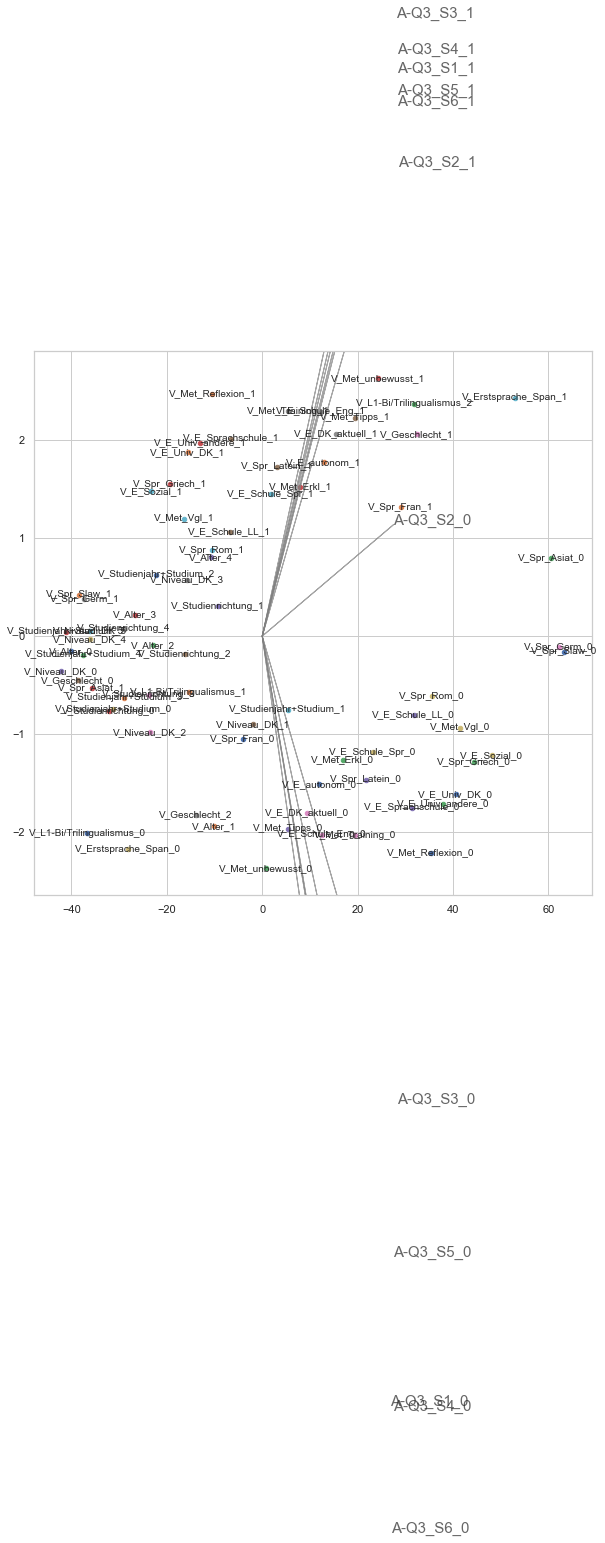

In [132]:
graf_biplot_test(testdf,6)